##### Overleaf do trabalho (modo edição): https://www.overleaf.com/7275553799qscsrdwqqrrh
##### Canva da apresentação (modo edição): https://www.canva.com/design/DAFo16MCBiM/vOz4k009hrZ4HLwtD1kySA/edit?utm_content=DAFo16MCBiM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Coleta de Dados

In [13]:
dados = pd.read_csv('../input/indicadores-economicos-rd/raw_data.csv', delimiter=';', decimal='.')

# Pré-processamento dos dados

In [14]:
def verificarDados(dados):
    
    aux = (dados.isnull() | dados.isin(['..'])).mean() #isnull() dados vazios e isin dados com espaço
    print("\nDados treinamento: porcentagem das variáveis com valores vazios e/ou inválidos\n")
    print(aux[aux != 0]*100)
    
verificarDados(dados)


Dados treinamento: porcentagem das variáveis com valores vazios e/ou inválidos

Agriculture, forestry, and fishing, value added (% of GDP)         4.347826
Annual freshwater withdrawals, total (% of internal resources)    11.594203
CO2 emissions (metric tons per capita)                             8.695652
Exports of goods and services (% of GDP)                          15.942029
GDP (current US$)                                                  2.898551
GDP growth (annual %)                                              2.898551
GNI per capita, Atlas method (current US$)                         2.898551
GNI, Atlas method (current US$)                                    2.898551
Inflation, GDP deflator (annual %)                                 2.898551
Life expectancy at birth, total (years)                            4.347826
Mortality rate, under-5 (per 1,000 live births)                    4.347826
Electric power consumption (kWh per capita)                       40.217391
dtype: 

In [15]:
# Verificando os dados
dados

,Country Name,Country Code,Time,Time Code,"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",CO2 emissions (metric tons per capita),Exports of goods and services (% of GDP),GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Population, total",Urban population growth (annual %),Electric power consumption (kWh per capita),Population growth (annual %)
0,Argentina,ARG,2000,YR2000,4.679910944,10.39956336,3.56791849,10.98637523,2.84204E+11,-0.788998939,7430,2.75544E+11,1.037287101,73.926,19.7,37070774,1.346647,2077.539573,1.133277
1,Argentina,ARG,2001,YR2001,4.568589609,10.62750778,3.341877067,11.57900808,2.68697E+11,-4.408839683,6960,2.60812E+11,-1.095767718,74.186,19,37480493,1.308732,2108.990402,1.099171
2,Argentina,ARG,2002,YR2002,10.20664671,10.85545221,3.100488668,28.382597,97724004252,-10.89448483,4020,1.52402E+11,30.55520405,74.408,18.3,37885028,1.275955,2003.667517,1.073538
3,Argentina,ARG,2003,YR2003,10.32816694,11.08339664,3.334890879,25.93094293,1.27587E+11,8.837040796,3640,1.39193E+11,10.49570302,74.08,17.7,38278164,1.228792,2169.487544,1.032361
4,Argentina,ARG,2004,YR2004,8.36248661,11.31134106,3.65608487,23.84761942,1.64658E+11,9.029573301,3360,1.29809E+11,18.36335425,74.855,17.1,38668796,1.209159,2282.822563,1.015337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Suriname,SUR,2018,YR2018,10.03296998,0.622121212,3.615421541,..,3996198760,4.948270766,5790,3437579134,5.660594092,72.553,18.8,593715,1.070966,..,1.042274
272,Suriname,SUR,2019,YR2019,8.596906948,0.622121212,4.42581305,..,4016040575,1.168797882,6020,3612321181,5.177652595,72.242,18.3,600301,1.156194,..,1.103179
273,Suriname,SUR,2020,YR2020,8.136028415,0.622121212,4.285076557,..,2911807496,-15.97519639,4500,2730334701,45.21776444,72.561,17.7,607065,1.202015,..,1.120467
274,Suriname,SUR,2021,YR2021,9.188493633,..,..,..,2984706244,-2.729618827,4410,2702729574,56.11973655,70.274,17.2,612985,1.076446,..,0.970460


In [16]:
index = dados.columns.to_list()
index

['Country Name',
 'Country Code',
 'Time',
 'Time Code',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'CO2 emissions (metric tons per capita)',
 'Exports of goods and services (% of GDP)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GNI per capita, Atlas method (current US$)',
 'GNI, Atlas method (current US$)',
 'Inflation, GDP deflator (annual %)',
 'Life expectancy at birth, total (years)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'Population, total',
 'Urban population growth (annual %)',
 'Electric power consumption (kWh per capita)',
 'Population growth (annual %)']

### Como "Eletrical power consumption" apresenta muitos valores vazios foi decidido por excluir essa coluna. E as colunas de "Country Code" e "Time Code" também são irrelevantes para análise.

In [17]:
index_excluidos = ['Electric power consumption (kWh per capita)', 'Country Code', 'Time Code']

dados = dados.drop(index_excluidos, axis=1)


index = dados.columns.to_list()
index

['Country Name',
 'Time',
 'Agriculture, forestry, and fishing, value added (% of GDP)',
 'Annual freshwater withdrawals, total (% of internal resources)',
 'CO2 emissions (metric tons per capita)',
 'Exports of goods and services (% of GDP)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GNI per capita, Atlas method (current US$)',
 'GNI, Atlas method (current US$)',
 'Inflation, GDP deflator (annual %)',
 'Life expectancy at birth, total (years)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'Population, total',
 'Urban population growth (annual %)',
 'Population growth (annual %)']

In [18]:
# Verificando o tipo de dados de cada coluna
dados.dtypes

Country Name                                                       object
Time                                                                int64
Agriculture, forestry, and fishing, value added (% of GDP)         object
Annual freshwater withdrawals, total (% of internal resources)     object
CO2 emissions (metric tons per capita)                             object
Exports of goods and services (% of GDP)                           object
GDP (current US$)                                                  object
GDP growth (annual %)                                              object
GNI per capita, Atlas method (current US$)                         object
GNI, Atlas method (current US$)                                    object
Inflation, GDP deflator (annual %)                                 object
Life expectancy at birth, total (years)                            object
Mortality rate, under-5 (per 1,000 live births)                    object
Population, total                     

In [19]:
# Pela análise acima os dados não foram convertidos corretamente, assim é feito a conversao
for coluna in dados.columns:
    if coluna == 'Country Name':
        pass
    else:
        dados[coluna] = pd.to_numeric(dados[coluna], errors='coerce')

# Verificando novamente o tipo de dados de cada coluna
dados.dtypes

Country Name                                                       object
Time                                                                int64
Agriculture, forestry, and fishing, value added (% of GDP)        float64
Annual freshwater withdrawals, total (% of internal resources)    float64
CO2 emissions (metric tons per capita)                            float64
Exports of goods and services (% of GDP)                          float64
GDP (current US$)                                                 float64
GDP growth (annual %)                                             float64
GNI per capita, Atlas method (current US$)                        float64
GNI, Atlas method (current US$)                                   float64
Inflation, GDP deflator (annual %)                                float64
Life expectancy at birth, total (years)                           float64
Mortality rate, under-5 (per 1,000 live births)                   float64
Population, total                     

# Tratamento

In [20]:
verificarDados(dados)


Dados treinamento: porcentagem das variáveis com valores vazios e/ou inválidos

Agriculture, forestry, and fishing, value added (% of GDP)         4.347826
Annual freshwater withdrawals, total (% of internal resources)    11.594203
CO2 emissions (metric tons per capita)                             8.695652
Exports of goods and services (% of GDP)                          15.942029
GDP (current US$)                                                  2.898551
GDP growth (annual %)                                              2.898551
GNI per capita, Atlas method (current US$)                         2.898551
GNI, Atlas method (current US$)                                    2.898551
Inflation, GDP deflator (annual %)                                 2.898551
Life expectancy at birth, total (years)                            4.347826
Mortality rate, under-5 (per 1,000 live births)                    4.347826
dtype: float64


### Para uma primeira análise será feito um estudo apenas para o Brasil

In [21]:
# Função para preenchimento de dados com dado anterior
def fill_missing_pos(dados):
    return dados.fillna(method='ffill')

# Chamar a função para preenchimento da coluna 'Feature1'
dados_filled = fill_missing_pos(dados)

dados_filled


,Country Name,Time,"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",CO2 emissions (metric tons per capita),Exports of goods and services (% of GDP),GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)","Population, total",Urban population growth (annual %),Population growth (annual %)
0,Argentina,2000,4.679911,10.399563,3.567918,10.986375,2.842040e+11,-0.788999,7430.0,2.755440e+11,1.037287,73.926,19.7,37070774,1.346647,1.133277
1,Argentina,2001,4.568590,10.627508,3.341877,11.579008,2.686970e+11,-4.408840,6960.0,2.608120e+11,-1.095768,74.186,19.0,37480493,1.308732,1.099171
2,Argentina,2002,10.206647,10.855452,3.100489,28.382597,9.772400e+10,-10.894485,4020.0,1.524020e+11,30.555204,74.408,18.3,37885028,1.275955,1.073538
3,Argentina,2003,10.328167,11.083397,3.334891,25.930943,1.275870e+11,8.837041,3640.0,1.391930e+11,10.495703,74.080,17.7,38278164,1.228792,1.032361
4,Argentina,2004,8.362487,11.311341,3.656085,23.847619,1.646580e+11,9.029573,3360.0,1.298090e+11,18.363354,74.855,17.1,38668796,1.209159,1.015337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,Suriname,2018,10.032970,0.622121,3.615422,52.547319,3.996199e+09,4.948271,5790.0,3.437579e+09,5.660594,72.553,18.8,593715,1.070966,1.042274
272,Suriname,2019,8.596907,0.622121,4.425813,52.547319,4.016041e+09,1.168798,6020.0,3.612321e+09,5.177653,72.242,18.3,600301,1.156194,1.103179
273,Suriname,2020,8.136028,0.622121,4.285077,52.547319,2.911807e+09,-15.975196,4500.0,2.730335e+09,45.217764,72.561,17.7,607065,1.202015,1.120467
274,Suriname,2021,9.188494,0.622121,4.285077,52.547319,2.984706e+09,-2.729619,4410.0,2.702730e+09,56.119737,70.274,17.2,612985,1.076446,0.970460


In [52]:
dados_filled = dados_filled[dados_filled['Time'] <= 2020] # Dados acima de 2020 não foram usados pois tem muitas colunas sem dados


dados_brasil = dados_filled[dados_filled['Country Name'] == 'Brazil']
dados_brasil_copy = dados_brasil.drop('Country Name', axis=1)

y = dados_brasil[['GDP (current US$)']]
#x = dados_brasil.drop(columns=['Country Name','GDP (current US$)'], axis=1)
x = dados_brasil[['CO2 emissions (metric tons per capita)','Annual freshwater withdrawals, total (% of internal resources)']]
# --------

# y = dados_filled['GDP growth (annual %)']
# x = dados_filled.drop(columns=['GDP growth (annual %)','Country Name'], axis=1)

dados_filled = dados_filled.drop('Country Name', axis=1)

In [23]:
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
# from sklearn.linear_model import LinearRegression
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Input, GaussianNoise
from keras import backend as K
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

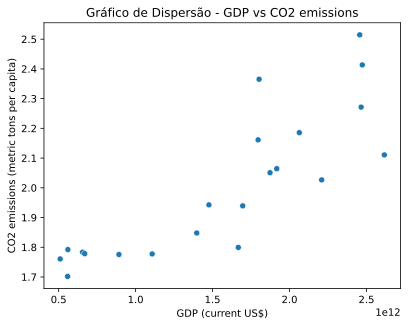

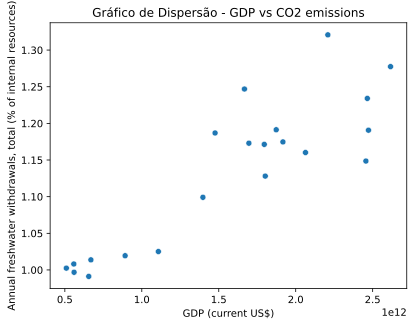

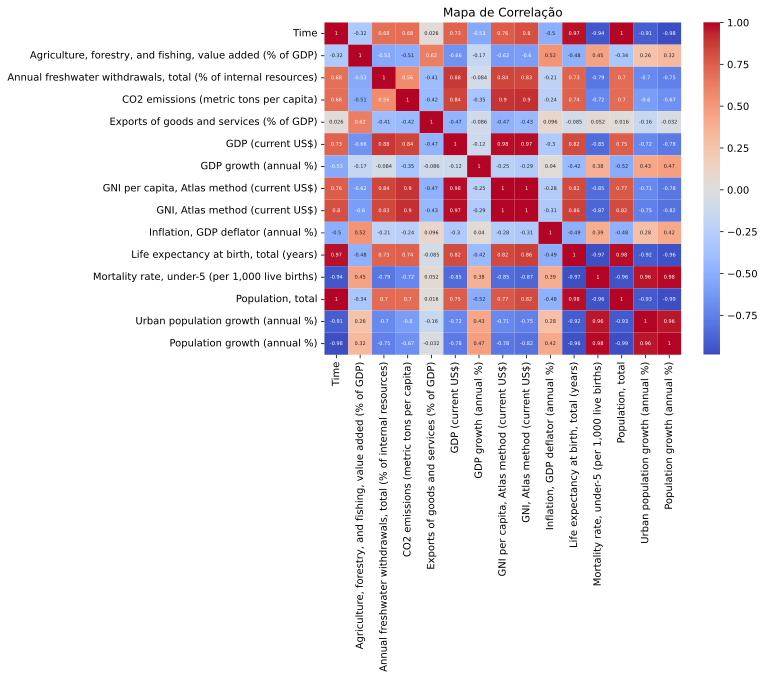

In [63]:
# Calcular a matriz de correlação
concat = pd.concat([x, y], ignore_index=True)
correlation_matrix = dados_brasil_copy.corr()
#correlation_matrix = dados_filled.corr()

#Plotar um gráfico de dispersão entre as colunas 'GDP (current US$)' e 'CO2 emissions (metric tons per capita)'
sns.scatterplot(x='GDP (current US$)', y='CO2 emissions (metric tons per capita)', data=dados_brasil)
plt.title("Gráfico de Dispersão - GDP vs CO2 emissions")
plt.xlabel("GDP (current US$)")
plt.ylabel("CO2 emissions (metric tons per capita)")
plt.show()

#Plotar um gráfico de dispersão entre as colunas 'GDP (current US$)' e 'Annual freshwater withdrawals, total (% of internal resources)'
sns.scatterplot(x='GDP (current US$)', y='Annual freshwater withdrawals, total (% of internal resources)', data=dados_brasil)
plt.title("Gráfico de Dispersão - GDP vs CO2 emissions")
plt.xlabel("GDP (current US$)")
plt.ylabel("Annual freshwater withdrawals, total (% of internal resources)")
plt.show()

#Plotar um mapa de calor da  matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={'size': 5})
plt.title("Mapa de Correlação")

plt.savefig("mapa2.png", format="png", dpi=300, bbox_inches='tight')
plt.show()



### Normalização e separação dos dados teste, validação e treino

In [25]:
# Separar em conjunto de treino, validação e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=45)
x_treino, x_val, y_treino, y_val = train_test_split(x_treino, y_treino, test_size=0.2, random_state=45)

# Normalizar os dados
scaler = MinMaxScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)
x_val = scaler.transform(x_val)


# y_max = np.max(y_treino)
# y_min = np.min(y_treino)
# y_treino = (y_treino - y_min) / (y_max - y_min)

scaler_y = MinMaxScaler()
y_treino = scaler_y.fit_transform(y_treino)
#y_teste = scaler_y.transform(y_teste)
y_val = scaler_y.transform(y_val)

print('Shape:', np.shape(x_treino))
print('Shape:', np.shape(x_teste))
#print('Shape:', np.shape(x_val))

y_teste

Shape: (12, 2)
Shape: (5, 2)


,GDP (current US$)
36,2.472820e+12
40,2.063510e+12
43,1.476110e+12
25,5.097950e+11
39,1.795690e+12


# Método 1

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [70]:
def criaRedeNeural(activation1='relu', neurons1=50, activation2='relu', neurons2=15):   
    # Criação do modelo da rede neural
    model = Sequential()

    # Camada de entrada com tamanho x_treino.shape[1]
    model.add(Input(shape=(x_treino.shape[1],)))

    # Adição da primeira camada oculta com 32 neurônios e função de ativação ReLU
    model.add(Dense(neurons1, activation=activation1))

    #model.add(GaussianNoise(1e-1))

    # Adição da segunda camada oculta com 16 neurônios e função de ativação ReLU
    model.add(Dense(neurons2, activation=activation2))

    # Camada de saída com um neurônio e função de ativação sigmoid para classificação binária
    model.add(Dense(1, activation='linear'))
    #model.add(Dense(1))

    # Compilação do modelo com a métrica personalizada "mean_absolute_percentage_error"
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse'])

    return model

In [71]:
model = criaRedeNeural()
    
checkpoint = ModelCheckpoint("best_model.hdf5", 
                             monitor='mean_squared_error', # Métrica a ser monitorada para determinar o "melhor" modelo
                             verbose=2, # Exibe progresso
                             save_best_only=True, # Salva apenas o melhor modelo
                             mode='auto', # Menor valor do MAPE 
                             period=1)

# Exibir um resumo da arquitetura do modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                150       
                                                                 
 dense_7 (Dense)             (None, 15)                765       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 931
Trainable params: 931
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = KerasRegressor(build_fn=criaRedeNeural, verbose=0)

# Definição da grade de hiperparâmetros a ser explorada
param_grid = {
    'activation1': ['relu', 'sigmoid'],
    'neurons1': [50],
    'activation2': ['relu', 'sigmoid','tanh'],
    'neurons2': [10, 15, 20]
}

# Criação da busca em grade
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)

# Execução da busca em grade
grid_result = grid_search.fit(x_treino, y_treino, epochs=50, batch_size=1)

# Melhor combinação de hiperparâmetros encontrada
print("Melhor combinação de hiperparâmetros: ", grid_result.best_params_)

# Melhor estimativa do desempenho do modelo
print("Melhor estimativa do desempenho: ", grid_result.best_score_)

# Melhor estimativa: ReLu 50 15

In [72]:
# Treinar a rede neural Model
history = model.fit(x_treino, y_treino, 
                    epochs=200,
                    batch_size=1,
                    shuffle=True,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint])

#validation_split=0.2 validation_data=(x_val, y_val)

Epoch 1/200
12/12 [==============================] - 1s 19ms/step - loss: 0.2114 - mae: 0.3602 - mse: 0.2114 - val_loss: 0.1163 - val_mae: 0.3058 - val_mse: 0.1163
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 0.1128 - mae: 0.2750 - mse: 0.1128 - val_loss: 0.0477 - val_mae: 0.2083 - val_mse: 0.0477
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0540 - mae: 0.1904 - mse: 0.0540 - val_loss: 0.0180 - val_mae: 0.1315 - val_mse: 0.0180
Epoch 4/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0306 - mae: 0.1375 - mse: 0.0306 - val_loss: 0.0091 - val_mae: 0.0663 - val_mse: 0.0091
Epoch 5/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0182 - mae: 0.1123 - mse: 0.0182 - val_loss: 0.0111 - val_mae: 0.0756 - val_mse: 0.0111
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 0.0164 - mae: 0.1081 - mse: 0.0164 - val_loss: 0.0159 - val_mae: 0.1095 - val_mse: 0.0159
Epoch 7/200
12/12 [==

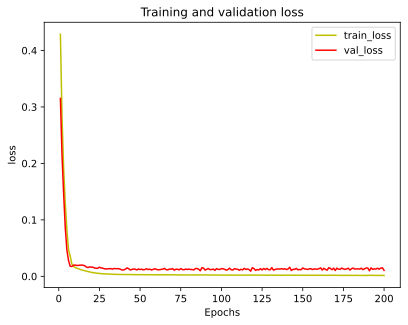

In [66]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'y')
    plt.plot(epochs, val_metrics, 'r')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.savefig("loss.png", format="png", dpi=300, bbox_inches='tight')
    plt.show()

plot_metric(history,"loss")
# plot_metric(history,"mae")
# plt.savefig("mae.png", format="png", dpi=300, bbox_inches='tight')

In [74]:
# Obter as métricas de treinamento e validação
train_mse = history.history['mse']
val_mse = history.history['val_mse']

train_mae = history.history['mae']
val_mae = history.history['val_mae']

# Identificar os melhores valores das métricas de validação
best_val_mse = min(val_mse)
best_val_mae = min(val_mae)

# Exibir as melhores métricas
print("Melhor MSE de validação:", best_val_mse)
print("Melhor MAE de validação:", best_val_mae)

Melhor MSE de validação: 0.0067358966916799545
Melhor MAE de validação: 0.06625451147556305


In [48]:
# Obtem a saída do conjunto teste
y_dnn = model.predict(x_teste)
y_dnn = scaler_y.inverse_transform(y_dnn)

print('Saída previsão:\n', y_dnn)
print('Saída real:\n',y_teste.values)

mae = mean_absolute_error(y_teste,y_dnn)
mse = mean_squared_error(y_teste, y_dnn)
mape = mean_absolute_percentage_error(y_teste,y_dnn)
r2score = r2_score(y_teste, y_dnn)

print('MAE:', mae)
print('MSE:', mse)
print('MAPE:', mape*100)
print("r2:", r2score)


1/1 [==============================] - 0s 21ms/step
Saída previsão:
 [[2.4244508e+12]
 [2.0030032e+12]
 [1.8827988e+12]
 [6.5317798e+11]
 [2.0154505e+12]]
Saída real:
 [[2.47282e+12]
 [2.06351e+12]
 [1.47611e+12]
 [5.09795e+11]
 [1.79569e+12]]
MAE: 175741641203.2
MSE: 4.804995832528394e+22
MAPE: 14.560696416509883
r2: 0.8907275649980598


In [78]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

print(y_teste.values)
print(y_dnn)

mae = mean_absolute_error(y_teste,y_dnn)
mse = mean_squared_error(y_teste, y_dnn)
mape = mean_absolute_percentage_error(y_teste,y_dnn)
r2score = r2_score(y_teste, y_dnn)


print(f'MAE: {mae:.2e}')
print(f'MAPE: {mape*100:.2f}')
print(f'r2: {r2score:.2f}')


[[2.47282e+12]
 [2.06351e+12]
 [1.47611e+12]
 [5.09795e+11]
 [1.79569e+12]]
[[2.4244508e+12]
 [2.0030032e+12]
 [1.8827988e+12]
 [6.5317798e+11]
 [2.0154505e+12]]
MAE: 1.76e+11
MAPE: 14.56
r2: 0.89
